## EDA

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.options.mode.chained_assignment = None
%matplotlib inline

In [12]:
df = pd.read_csv('./clean_info.csv')
df.drop("Unnamed: 0", axis = 1, inplace = True)
df


,hour,swell_rating,primary_swell_height,primary_swell_period,year,month,day
0,0,1,1.0,8,2020,1,1
1,3,0,1.0,7,2020,1,1
2,6,1,0.9,7,2020,1,1
3,9,1,0.8,7,2020,1,1
4,12,0,0.8,7,2020,1,1
...,...,...,...,...,...,...,...
9541,15,1,0.7,8,2021,12,30
9542,21,0,0.9,7,2021,12,30
9543,9,1,1.1,7,2021,12,31
9544,15,1,0.9,8,2021,12,31


### Creating plots of the following:
### -rating according to swell height
### -rating according to swell period
### -rating according to month
### -swell height according to month

Text(0.5, 1.0, 'swell height according to month')

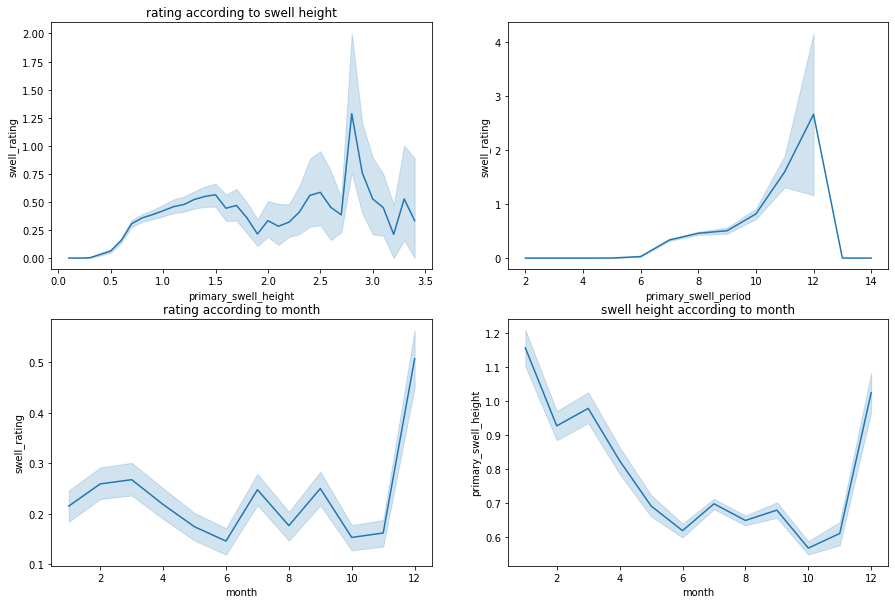

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(ax=axes[0][0], x= df['primary_swell_height'], y = df['swell_rating'])
axes[0][0].set_title('rating according to swell height')


sns.lineplot(ax=axes[0][1], x = df['primary_swell_period'], y = df['swell_rating'] )
axes[1][0].set_title('rating according to swell period')

sns.lineplot(ax=axes[1][0], x = df['month'], y = df['swell_rating'])
axes[1][0].set_title('rating according to month')

sns.lineplot(ax=axes[1][1], x = df['month'], y = df['primary_swell_height'])
axes[1][1].set_title('swell height according to month')


## Create previous plots but with comparision by year

Text(0.5, 1.0, 'swell height according to month')

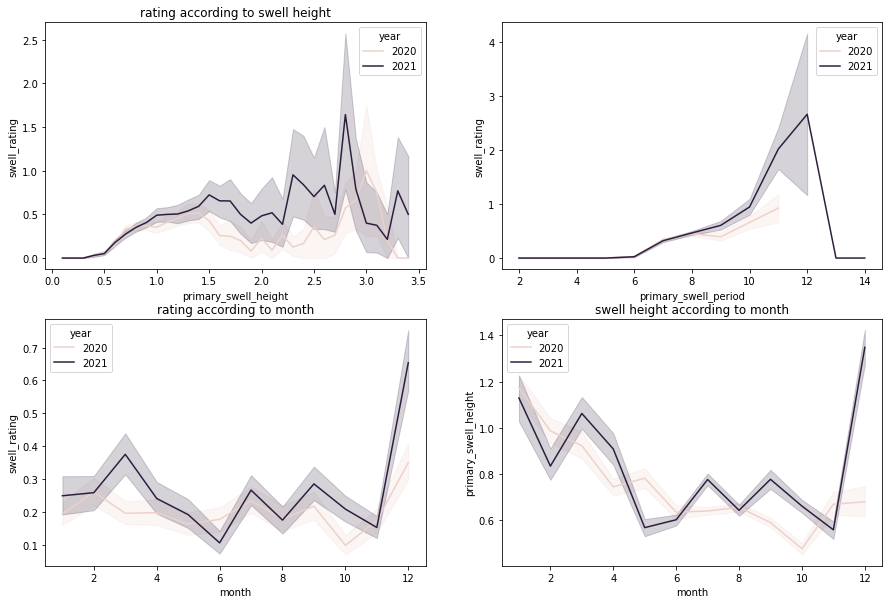

In [14]:


fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(ax=axes[0][0], x= df['primary_swell_height'], y = df['swell_rating'] , hue=df['year'])
axes[0][0].set_title('rating according to swell height')


sns.lineplot(ax=axes[0][1], x = df['primary_swell_period'], y = df['swell_rating'] , hue=df['year'])
axes[1][0].set_title('rating according to swell period')

sns.lineplot(ax=axes[1][0], x = df['month'], y = df['swell_rating'], hue=df['year'])
axes[1][0].set_title('rating according to month')

sns.lineplot(ax=axes[1][1], x = df['month'], y = df['primary_swell_height'], hue=df['year'])
axes[1][1].set_title('swell height according to month')



## Histograms of the stats:

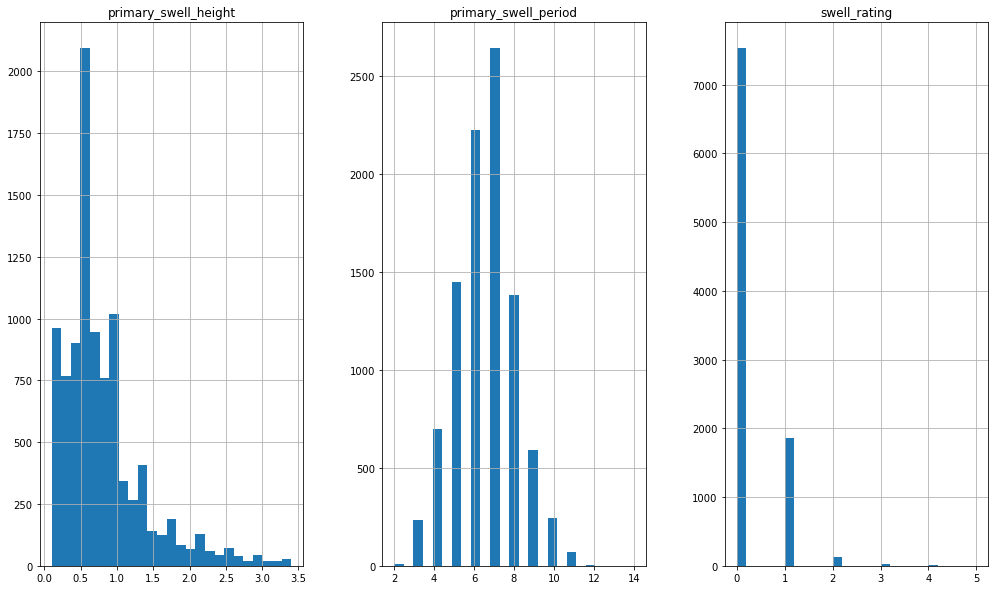

In [15]:
dfStats = df.copy()
info = dfStats.hist(bins=25, layout=(1,3), figsize=(17,10),column =['primary_swell_height','primary_swell_period', 'swell_rating'])

### inserting to a new dataframe an avarages dataframe

In [16]:
df2 = pd.read_csv('./for_eda.csv')
df2

,date,swell_rating,primary_swell_height,primary_swell_period
0,2020-01-01,0.875000,0.816667,7.125000
1,2020-01-02,0.000000,0.704167,5.833333
2,2020-01-03,0.041667,1.483333,6.791667
3,2020-01-04,0.000000,1.754167,7.666667
4,2020-01-05,0.000000,1.658333,7.375000
...,...,...,...,...
715,2021-12-27,0.000000,0.175000,6.166667
716,2021-12-28,0.000000,0.175000,5.625000
717,2021-12-29,0.000000,0.270833,6.000000
718,2021-12-30,0.541667,0.645833,7.375000


### Creating Avarege Swell Height/Period ratio plot

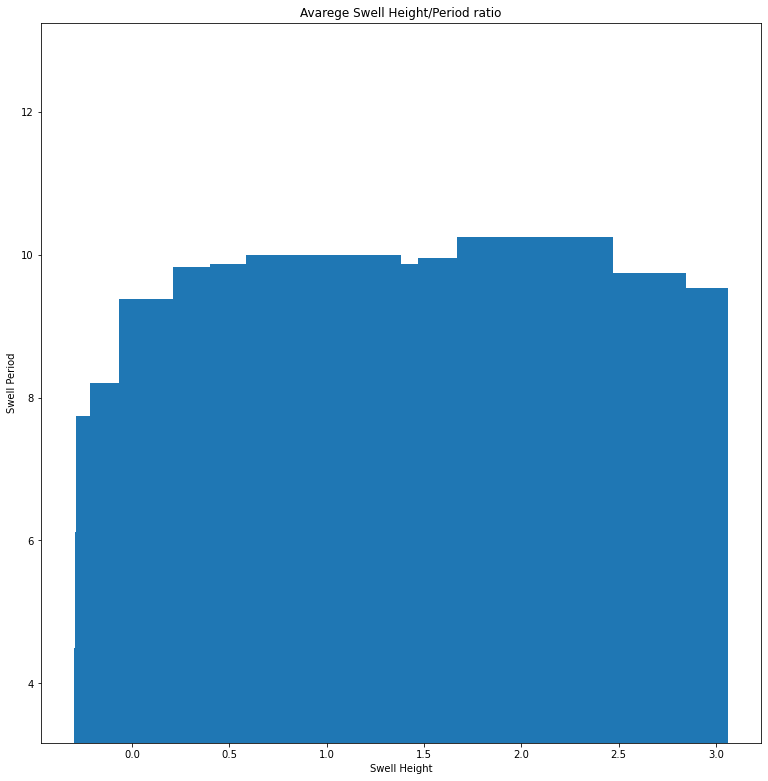

In [17]:
swell_height = df2['primary_swell_height']
fig = plt.figure(figsize = (10,10))
ax = fig.add_axes([0,0,1,1])
xdata = swell_height
ydata = df2['primary_swell_period']
ax.bar(xdata,ydata)
ax.set_ylim(min(ydata), max(ydata)+3)
plt.xlabel("Swell Height")
plt.ylabel('Swell Period')
plt.title('Avarege Swell Height/Period ratio')
plt.show()

### Creating Avarege Swell Height/Rate ratio plot

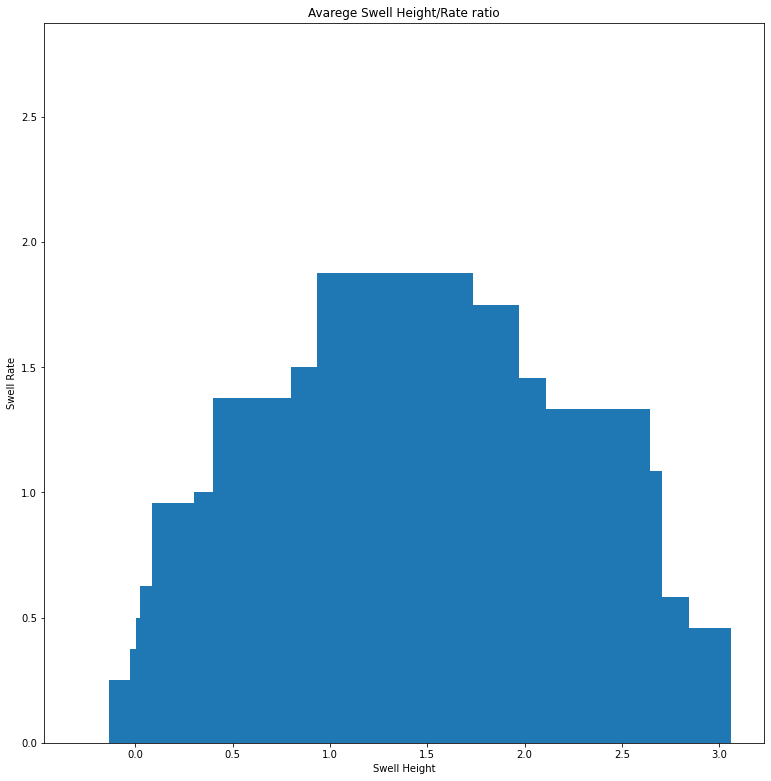

In [18]:
swell_height = df2['primary_swell_height']
fig = plt.figure(figsize = (10,10))
ax = fig.add_axes([0,0,1,1])
xdata = swell_height
ydata = df2['swell_rating']
ax.bar(xdata,ydata)
ax.set_ylim(min(ydata), max(ydata)+1)
plt.xlabel("Swell Height")
plt.ylabel('Swell Rate')
plt.title('Avarege Swell Height/Rate ratio')
plt.show()

### Creating Avarege Swell Period/Rate ratio plot

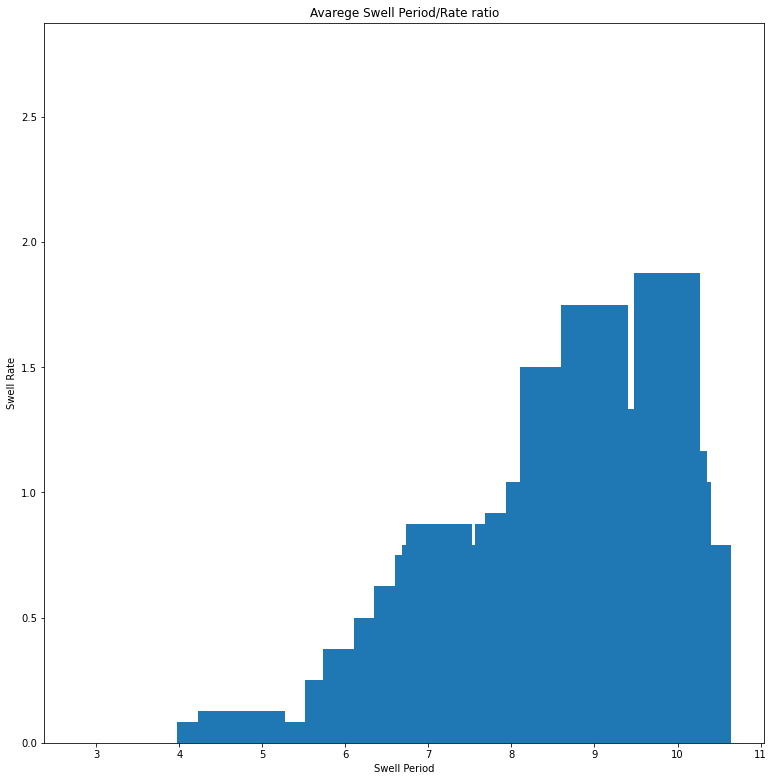

In [19]:
swell_height = df2['primary_swell_period']
fig = plt.figure(figsize = (10,10))
ax = fig.add_axes([0,0,1,1])
xdata = swell_height
ydata = df2['swell_rating']
ax.bar(xdata,ydata)
ax.set_ylim(min(ydata), max(ydata)+1)
plt.xlabel("Swell Period")
plt.ylabel('Swell Rate')
plt.title('Avarege Swell Period/Rate ratio')
plt.show()